In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import *
import pandas as pd


In [2]:
def map_type_to_club_category(type_value):
    if type_value == 1:
        return "Big clubs"
    elif type_value == 2:
        return "Medium clubs"
    elif type_value == 3:
        return "Small clubs"
    else:
        return "Unknown"

In [3]:
params={
        "C": 20,
        "F": 1,
        "P": 550,
        "league_range": [(78, 97)],
        "FFP": [False, True], 
    }


results = mesa.batch_run(
    model_cls=MyModel,
    parameters = params,
    iterations=300,
    max_steps=100,
    data_collection_period = 1,  # Collect data at each time step
    display_progress=True,
    number_processes=4 
)

results_df = pd.DataFrame(results)


100%|█████████████████████████████████████████| 600/600 [54:12<00:00,  5.42s/it]


In [4]:
print(results_df.keys())
print('\n')
print(results_df.head())
print('\n')
print(results_df.tail())

Index(['RunId', 'iteration', 'Step', 'C', 'F', 'P', 'league_range', 'FFP',
       'Winner Club', 'Winner level', 'Season', 'Average revenue by league',
       'Total revenue by league', 'Average Transferred Value (Type 1)',
       'Average Transferred Value (Type 2)',
       'Average Transferred Value (Type 3)', 'AgentID', 'Club Revenue',
       'Team size', 'Name', 'TV', 'Type'],
      dtype='object')


   RunId  iteration  Step   C  F    P league_range    FFP Winner Club  \
0      0          0     0  20  1  550     (78, 97)  False        None   
1      0          0     1  20  1  550     (78, 97)  False        None   
2      0          0     1  20  1  550     (78, 97)  False        None   
3      0          0     1  20  1  550     (78, 97)  False        None   
4      0          0     1  20  1  550     (78, 97)  False        None   

   Winner level  ...  Total revenue by league  \
0           NaN  ...      {'Ligue 1': 1962.0}   
1           NaN  ...      {'Ligue 1': 1962.0}   
2     

Median Club TV rights: 22.5
Average Club TV rights: 36.8


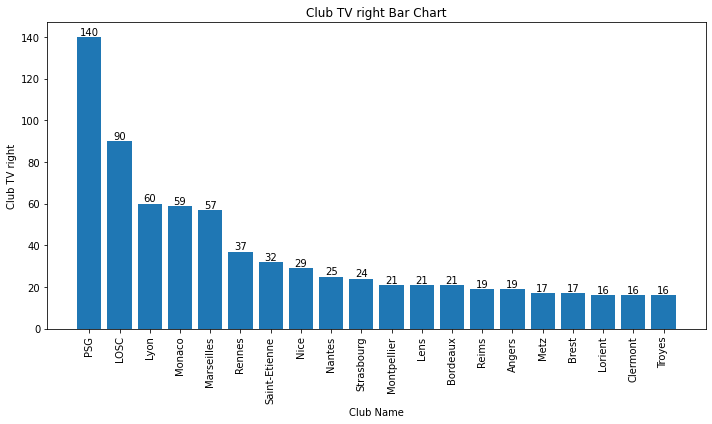

In [5]:
# TV rights 

club_df = results_df[['TV', 'Name']].dropna()
club_df = club_df.head(20)
df_sorted = club_df.sort_values(by='TV', ascending=False)


plt.figure(figsize=(10, 6))  # Set the size of the chart
bars = plt.bar(df_sorted['Name'], df_sorted['TV'])
plt.xlabel('Club Name')
plt.ylabel('Club TV right')
plt.title('Club TV right Bar Chart')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

median_tv_rights = np.median(df_sorted['TV'])
average_tv_rights = np.mean(df_sorted['TV'])

print("Median Club TV rights:", median_tv_rights)
print("Average Club TV rights:", average_tv_rights)

# Add the numeric values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()


Median Club Revenue: 51.0
Average Club Revenue: 98.1


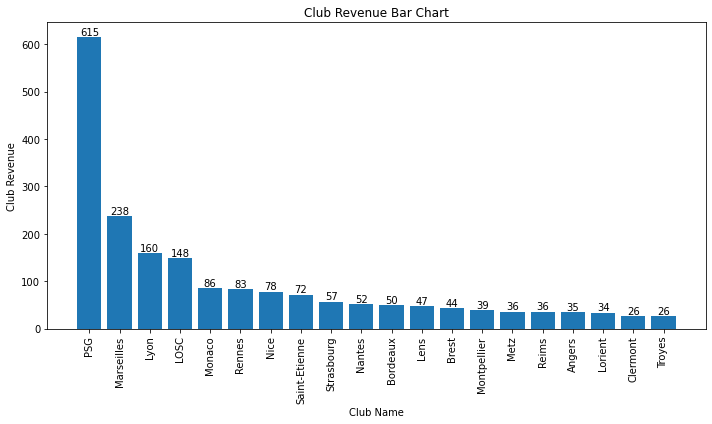

In [6]:
# Club revenue at initialization
first_df = results_df[results_df['Step'] == 1]
club_df = first_df[['Club Revenue', 'Name']].dropna()
club_df = club_df.head(20)

df_sorted = club_df.sort_values(by='Club Revenue', ascending=False)

plt.figure(figsize=(10, 6))  # Set the size of the chart

bars = plt.bar(df_sorted['Name'], df_sorted['Club Revenue'])

plt.xlabel('Club Name')
plt.ylabel('Club Revenue')
plt.title('Club Revenue Bar Chart')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

median_revenue = np.median(df_sorted['Club Revenue'])
average_revenue = np.mean(df_sorted['Club Revenue'])

print("Median Club Revenue:", median_revenue)
print("Average Club Revenue:", average_revenue)

# Add the numeric values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

In [7]:
# Average team size by club

# Calculate average team size for each team type when FFP is true
average_team_size_ffp_true = results_df[results_df['FFP'] == True].groupby('Name')['Team size'].mean()

# Calculate average team size for each team type when FFP is false
average_team_size_ffp_false = results_df[results_df['FFP'] == False].groupby('Name')['Team size'].mean()

# Convert the results to DataFrames and reset index
average_team_size_ffp_true_df = average_team_size_ffp_true.reset_index()
average_team_size_ffp_true_df.columns = ['Name', 'With FFP']

average_team_size_ffp_false_df = average_team_size_ffp_false.reset_index()
average_team_size_ffp_false_df.columns = ['Name', 'Without FFP']

# Sort the DataFrames by 'Team size' column in descending order
average_team_size_ffp_true_df = average_team_size_ffp_true_df.sort_values(by='With FFP', ascending=False)
average_team_size_ffp_false_df = average_team_size_ffp_false_df.sort_values(by='Without FFP', ascending=False)

print(average_team_size_ffp_true_df)
print('\n')
print(average_team_size_ffp_false_df)


             Name   With FFP
14            PSG  34.655133
8      Marseilles  14.544967
7            Lyon  12.178833
4            LOSC  11.980833
16         Rennes  11.597333
10         Monaco  11.593233
1        Bordeaux  11.583233
13           Nice  11.577533
18     Strasbourg  11.576733
11    Montpellier  11.548900
12         Nantes  11.544167
6         Lorient  11.539633
15          Reims  11.539033
2           Brest  11.538567
0          Angers  11.532667
5            Lens  11.531467
17  Saint-Etienne  11.521233
9            Metz  11.515900
19         Troyes  11.489467
3        Clermont  11.489033


             Name  Without FFP
14            PSG    34.891867
8      Marseilles    14.147033
7            Lyon    12.119067
4            LOSC    12.075167
10         Monaco    11.666900
13           Nice    11.635700
16         Rennes    11.610633
17  Saint-Etienne    11.600867
18     Strasbourg    11.594833
5            Lens    11.579367
12         Nantes    11.573967
11    Montpellier

In [8]:
# Average team size by clubs category

# Calculate average team size for each team type when FFP is true
average_team_size_ffp_true = results_df[results_df['FFP'] == True].groupby('Type')['Team size'].mean()

# Calculate average team size for each team type when FFP is false
average_team_size_ffp_false = results_df[results_df['FFP'] == False].groupby('Type')['Team size'].mean()

# Convert the results to DataFrames and reset index
average_team_size_ffp_true_df = average_team_size_ffp_true.reset_index()
average_team_size_ffp_true_df['Type'] = average_team_size_ffp_true_df['Type'].apply(map_type_to_club_category)
average_team_size_ffp_true_df.columns = ['Type', 'With FFP']

average_team_size_ffp_false_df = average_team_size_ffp_false.reset_index()
average_team_size_ffp_false_df['Type'] = average_team_size_ffp_false_df['Type'].apply(map_type_to_club_category)
average_team_size_ffp_false_df.columns = ['Type', 'Without FFP']

print(average_team_size_ffp_true_df)
print('\n')
print(average_team_size_ffp_false_df)


           Type   With FFP
0     Big clubs  34.655133
1  Medium clubs  12.141995
2   Small clubs  11.535733


           Type  Without FFP
0     Big clubs    34.891867
1  Medium clubs    12.122195
2   Small clubs    11.543492


In [9]:
# Average transfer value by category of clubs

# Group the DataFrame by 'FFP' and calculate the mean of the relevant columns for each club type
grouped_avg_transferred_values = results_df.groupby(['FFP'])[
    ["Average Transferred Value (Type 1)",
    "Average Transferred Value (Type 2)",
    "Average Transferred Value (Type 3)"]
].mean()

# Print the calculated average transferred values for each FFP condition
for ffp, avg_values in grouped_avg_transferred_values.iterrows():
    print(f"FFP: {ffp}")
    for col_name, avg_value in avg_values.items():
        club_type_str = col_name.split(" ")[-1]  # Extract the club type string from the column name
        club_type = int(club_type_str.replace("(", "").replace(")", ""))  # Remove parentheses and convert to int
        club_category = map_type_to_club_category(club_type)
        print(f"  Average Transfer Value for {club_category}: {avg_value:.2f}")


FFP: False
  Average Transfer Value for Big clubs: 49.30
  Average Transfer Value for Medium clubs: 17.83
  Average Transfer Value for Small clubs: 7.85
FFP: True
  Average Transfer Value for Big clubs: 30.20
  Average Transfer Value for Medium clubs: 9.97
  Average Transfer Value for Small clubs: 6.19


In [10]:
# Winners dataframe

# winners_df = results_df[['Winner Club', 'Season','RunId', "Team size"]].set_index('Season')
winners_df = results_df[['Winner Club', 'Winner level', 'Season','RunId', 'Team size', 'FFP', 'Name', 'Type' ]]
winners_df = winners_df[winners_df['Winner Club'].notnull()]

winners_df = winners_df[winners_df['Winner Club'] == winners_df['Name']]

# Group by 'RunId' and 'Season', and get the first entry for each group (which corresponds to the winner)
winners_df = winners_df.groupby(['RunId', 'Season']).first()

winners_df['Club Category'] = winners_df['Type'].apply(map_type_to_club_category)


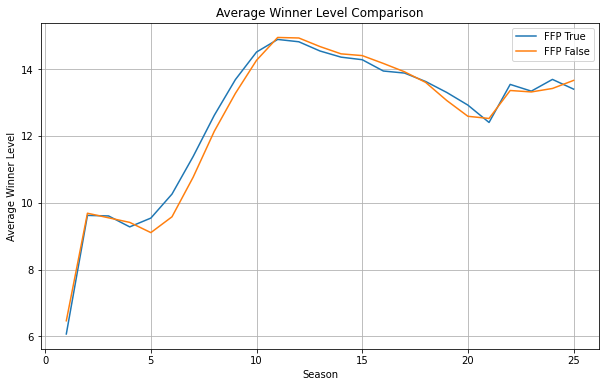

In [11]:
# Line chart for the evolution of winners' level

# Filter winners_df for FFP true and false cases
winners_ffp_true = winners_df[winners_df['FFP'] == True]
winners_ffp_false = winners_df[winners_df['FFP'] == False]

# Group winners by Season and calculate average winner level for each season
average_winner_level_ffp_true = winners_ffp_true.groupby('Season')['Winner level'].mean()
average_winner_level_ffp_false = winners_ffp_false.groupby('Season')['Winner level'].mean()

# Create line charts
plt.figure(figsize=(10, 6))
plt.plot(average_winner_level_ffp_true.index, average_winner_level_ffp_true, label='FFP True')
plt.plot(average_winner_level_ffp_false.index, average_winner_level_ffp_false, label='FFP False')
plt.xlabel('Season')
plt.ylabel('Average Winner Level')
plt.title('Average Winner Level Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Team size of winners

# Group by 'Winner Club' and calculate the average team size and count the number of times each club won when FFP is true
average_team_size_df_ffp_true = winners_ffp_true.groupby('Winner Club').agg(
    {"Team size": "mean", "Winner Club": "size"}).rename(columns={'Team size': 'Average Team Size (FFP True)',
                                                                  'Winner Club': 'Number of Wins'})

# Sort the DataFrame by the average team size in descending order
average_team_size_df_ffp_true = average_team_size_df_ffp_true.sort_values(by='Average Team Size (FFP True)',
                                                                          ascending=False)


# Group by 'Winner Club' and calculate the average team size and count the number of times each club won when FFP is false
average_team_size_df_ffp_false = winners_ffp_false.groupby('Winner Club').agg(
    {"Team size": "mean", "Winner Club": "size"}).rename(columns={'Team size': 'Average Team Size (FFP False)',
                                                                   'Winner Club': 'Number of Wins'})

# Sort the DataFrame by the average team size in descending order
average_team_size_df_ffp_false = average_team_size_df_ffp_false.sort_values(by='Average Team Size (FFP False)',
                                                                            ascending=False)

# Display the DataFrames
print(average_team_size_df_ffp_true)
print('\n')
print(average_team_size_df_ffp_false)


               Average Team Size (FFP True)  Number of Wins
Winner Club                                                
PSG                               24.285635            7219
Marseilles                        20.809524             126
LOSC                              18.758621              29
Lyon                              17.944444              36
Nice                              13.000000               7
Nantes                            12.000000               5
Angers                            11.000000               6
Strasbourg                        11.000000               1
Saint-Etienne                     11.000000               7
Rennes                            11.000000               6
Reims                             11.000000               7
Monaco                            11.000000               5
Montpellier                       11.000000               2
Bordeaux                          11.000000               4
Metz                              11.000

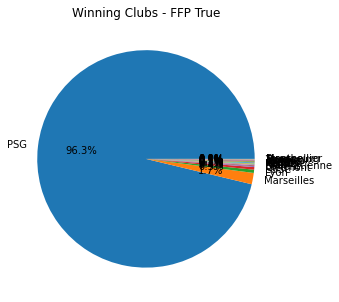

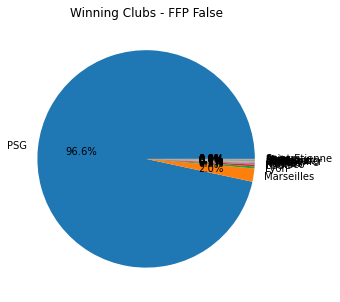

In [13]:
# Pie chart of winners club

# Reset the index of the DataFrame
winners_df_reset = winners_df.reset_index()

# Filter DataFrame based on FFP True
data_ffp_true = winners_df_reset[winners_df_reset['FFP'] == True]['Winner Club'].value_counts()

# Filter DataFrame based on FFP False
data_ffp_false = winners_df_reset[winners_df_reset['FFP'] == False]['Winner Club'].value_counts()

# Plotting Pie Chart for FFP True
plt.figure(figsize=(10, 5))
plt.pie(data_ffp_true, labels=data_ffp_true.index, autopct='%1.1f%%')
plt.title("Winning Clubs - FFP True")
plt.show()

# Plotting Pie Chart for FFP False
plt.figure(figsize=(10, 5))
plt.pie(data_ffp_false, labels=data_ffp_false.index, autopct='%1.1f%%')
plt.title("Winning Clubs - FFP False")
plt.show()


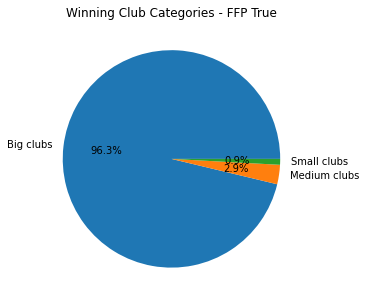

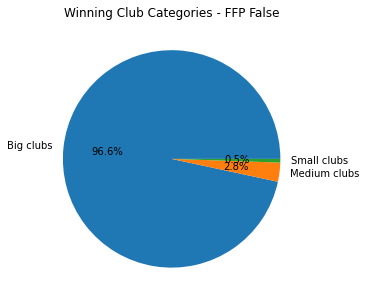

In [14]:
# Pie chart of winners club category

# Reset the index of the DataFrame
winners_df_reset = winners_df.reset_index()

# Filter DataFrame based on FFP True
data_ffp_true = winners_df_reset[winners_df_reset['FFP'] == True]['Club Category'].value_counts()

# Filter DataFrame based on FFP False
data_ffp_false = winners_df_reset[winners_df_reset['FFP'] == False]['Club Category'].value_counts()

# Plotting Pie Chart for FFP True
plt.figure(figsize=(10, 5))
plt.pie(data_ffp_true, labels=data_ffp_true.index, autopct='%1.1f%%')
plt.title("Winning Club Categories - FFP True")
plt.show()

# Plotting Pie Chart for FFP False
plt.figure(figsize=(10, 5))
plt.pie(data_ffp_false, labels=data_ffp_false.index, autopct='%1.1f%%')
plt.title("Winning Club Categories - FFP False")
plt.show()